In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=1.2)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the data

In [2]:
# Main DataFrame (df)
df = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/movies', index_col=0)
df.head()

domestic   worldwide  \
title                                               
Alice in Wonderland         334191110  1025467110   
Iron Man 2                  312433331   623933331   
The Twilight Saga: Eclipse  300531751   698491347   
Inception                   292576195   826137188   
Despicable Me               251513985   543113985   

                                                    distributor      opening  \
title                                                                          
Alice in Wonderland         Walt Disney Studios Motion Pictures  116101023.0   
Iron Man 2                                   Paramount Pictures  128122480.0   
The Twilight Saga: Eclipse                 Summit Entertainment   64832191.0   
Inception                                          Warner Bros.   62785337.0   
Despicable Me                                Universal Pictures   56397125.0   

                                 budget        date  runtime  widest rating  \
title                                                                         
Alice in Wonderland         200000000.0  2010-03-05    108.0  3739.0     PG   
Iron Man 2                  200000000.0  2010-05-07    124.0  4390.0  PG-13   
The Twilight Saga: Eclipse   68000000.0  2010-06-30    124.0  4468.0  PG-13   
Inception                   160000000.0  2010-07-16    148.0  3792.0  PG-13   
Despicable Me                69000000.0  2010-07-09     95.0  3602.0     PG   

                                                                       genres  
title                                                                          
Alice in Wonderland                        ['Adventure', 'Family', 'Fantasy']  
Iron Man 2                                  ['Action', 'Adventure', 'Sci-Fi']  
The Twilight Saga: Eclipse  ['Action', 'Adventure', 'Drama', 'Fantasy', 'R...  
Inception                       ['Action', 'Adventure', 'Sci-Fi', 'Thriller']  
Despicable Me               ['Animation', 'Comedy', 'Crime', 'Family', 'Fa...

In [3]:
# DataFrame copy (df_copy)
df_copy = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/df_copy', index_col=0)
df_copy.head()

domestic   worldwide  \
title                                               
Alice in Wonderland         334191110  1025467110   
Iron Man 2                  312433331   623933331   
The Twilight Saga: Eclipse  300531751   698491347   
Inception                   292576195   826137188   
Despicable Me               251513985   543113985   

                                                    distributor      opening  \
title                                                                          
Alice in Wonderland         Walt Disney Studios Motion Pictures  116101023.0   
Iron Man 2                                   Paramount Pictures  128122480.0   
The Twilight Saga: Eclipse                 Summit Entertainment   64832191.0   
Inception                                          Warner Bros.   62785337.0   
Despicable Me                                Universal Pictures   56397125.0   

                                 budget        date  runtime  widest rating  \
title                                                                         
Alice in Wonderland         200000000.0  2010-03-05    108.0  3739.0     PG   
Iron Man 2                  200000000.0  2010-05-07    124.0  4390.0  PG-13   
The Twilight Saga: Eclipse   68000000.0  2010-06-30    124.0  4468.0  PG-13   
Inception                   160000000.0  2010-07-16    148.0  3792.0  PG-13   
Despicable Me                69000000.0  2010-07-09     95.0  3602.0     PG   

                                                                       genres  \
title                                                                           
Alice in Wonderland                                Adventure, Family, Fantasy   
Iron Man 2                                          Action, Adventure, Sci-Fi   
The Twilight Saga: Eclipse  Action, Adventure, Drama, Fantasy, Romance, Th...   
Inception                                 Action, Adventure, Sci-Fi, Thriller   
Despicable Me                       Animation, Comedy, Crime, Family, Fantasy   

                           date_to_season  
title                                      
Alice in Wonderland                spring  
Iron Man 2                         spring  
The Twilight Saga: Eclipse         summer  
Inception                          summer  
Despicable Me                      summer

In [4]:
# Quantitative DataFrame (df_num)
df_num = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/movies_num', index_col=0)
df_num.head()

worldwide   domestic      opening       budget  \
title                                                                         
Alice in Wonderland         1025467110  334191110  116101023.0  200000000.0   
Iron Man 2                   623933331  312433331  128122480.0  200000000.0   
The Twilight Saga: Eclipse   698491347  300531751   64832191.0   68000000.0   
Inception                    826137188  292576195   62785337.0  160000000.0   
Despicable Me                543113985  251513985   56397125.0   69000000.0   

                            runtime  widest  
title                                        
Alice in Wonderland           108.0  3739.0  
Iron Man 2                    124.0  4390.0  
The Twilight Saga: Eclipse    124.0  4468.0  
Inception                     148.0  3792.0  
Despicable Me                  95.0  3602.0

In [5]:
# Distributor DataFrame (df_distributor)
df_distributor = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/distributor', index_col=0)
df_distributor.head()

DreamWorks  FilmDistrict  Focus Features  \
title                                                                  
Alice in Wonderland                  0             0               0   
Iron Man 2                           0             0               0   
The Twilight Saga: Eclipse           0             0               0   
Inception                            0             0               0   
Despicable Me                        0             0               0   

                            Fox Searchlight Pictures  Lionsgate  \
title                                                             
Alice in Wonderland                                0          0   
Iron Man 2                                         0          0   
The Twilight Saga: Eclipse                         0          0   
Inception                                          0          0   
Despicable Me                                      0          0   

                            Open Road Films (II)  Other  Paramount Pictures  \
title                                                                         
Alice in Wonderland                            0      0                   0   
Iron Man 2                                     0      0                   1   
The Twilight Saga: Eclipse                     0      0                   0   
Inception                                      0      0                   0   
Despicable Me                                  0      0                   0   

                            Relativity Media  Roadside Attractions  ...  \
title                                                               ...   
Alice in Wonderland                        0                     0  ...   
Iron Man 2                                 0                     0  ...   
The Twilight Saga: Eclipse                 0                     0  ...   
Inception                                  0                     0  ...   
Despicable Me                              0                     0  ...   

                            Screen Gems  Sony Pictures Classics  \
title                                                             
Alice in Wonderland                   0                       0   
Iron Man 2                            0                       0   
The Twilight Saga: Eclipse            0                       0   
Inception                             0                       0   
Despicable Me                         0                       0   

                            Sony Pictures Entertainment (SPE)  \
title                                                           
Alice in Wonderland                                         0   
Iron Man 2                                                  0   
The Twilight Saga: Eclipse                                  0   
Inception                                                   0   
Despicable Me                                               0   

                            Summit Entertainment  The Weinstein Company  \
title                                                                     
Alice in Wonderland                            0                      0   
Iron Man 2                                     0                      0   
The Twilight Saga: Eclipse                     1                      0   
Inception                                      0                      0   
Despicable Me                                  0                      0   

                            TriStar Pictures  Twentieth Century Fox  \
title                                                                 
Alice in Wonderland                        0                      0   
Iron Man 2                                 0                      0   
The Twilight Saga: Eclipse                 0                      0   
Inception                                  0                      0   
Despicable Me                              0                      0   

                       

In [6]:
# MPAA Rating DataFrame (df_rating)
df_rating = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/rating', index_col=0)
df_rating.head()

PG  PG-13  R
title                                   
Alice in Wonderland          1      0  0
Iron Man 2                   0      1  0
The Twilight Saga: Eclipse   0      1  0
Inception                    0      1  0
Despicable Me                1      0  0

In [7]:
#Genres DataFrame (df_genres)
df_genres = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/genres', index_col=0)
df_genres.head()

Action  Adventure  Animation  Biography  Comedy  \
title                                                                         
Alice in Wonderland              0          1          0          0       0   
Iron Man 2                       1          1          0          0       0   
The Twilight Saga: Eclipse       1          1          0          0       0   
Inception                        1          1          0          0       0   
Despicable Me                    0          0          1          0       1   

                            Crime  Documentary  Drama  Family  Fantasy  ...  \
title                                                                   ...   
Alice in Wonderland             0            0      0       1        1  ...   
Iron Man 2                      0            0      0       0        0  ...   
The Twilight Saga: Eclipse      0            0      1       0        1  ...   
Inception                       0            0      0       0        0  ...   
Despicable Me                   1            0      0       1        1  ...   

                            Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
title                                                                          
Alice in Wonderland              0      0        0        0        0       0   
Iron Man 2                       0      0        0        0        0       1   
The Twilight Saga: Eclipse       0      0        0        0        1       0   
Inception                        0      0        0        0        0       1   
Despicable Me                    0      0        0        0        0       0   

                            Sport  Thriller  War  Western  
title                                                      
Alice in Wonderland             0         0    0        0  
Iron Man 2                      0         0    0        0  
The Twilight Saga: Eclipse      0         1    0        0  
Inception                       0         1    0        0  
Despicable Me                   0         0    0        0  

[5 rows x 21 columns]

In [8]:
# Release Season (date) DataFrame (df_season)
df_season = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/season', index_col=0)
df_season.head()

spring  summer  winter
title                                             
Alice in Wonderland              1       0       0
Iron Man 2                       1       0       0
The Twilight Saga: Eclipse       0       1       0
Inception                        0       1       0
Despicable Me                    0       1       0

## Some EDA

In [9]:
df_copy.head()

domestic   worldwide  \
title                                               
Alice in Wonderland         334191110  1025467110   
Iron Man 2                  312433331   623933331   
The Twilight Saga: Eclipse  300531751   698491347   
Inception                   292576195   826137188   
Despicable Me               251513985   543113985   

                                                    distributor      opening  \
title                                                                          
Alice in Wonderland         Walt Disney Studios Motion Pictures  116101023.0   
Iron Man 2                                   Paramount Pictures  128122480.0   
The Twilight Saga: Eclipse                 Summit Entertainment   64832191.0   
Inception                                          Warner Bros.   62785337.0   
Despicable Me                                Universal Pictures   56397125.0   

                                 budget        date  runtime  widest rating  \
title                                                                         
Alice in Wonderland         200000000.0  2010-03-05    108.0  3739.0     PG   
Iron Man 2                  200000000.0  2010-05-07    124.0  4390.0  PG-13   
The Twilight Saga: Eclipse   68000000.0  2010-06-30    124.0  4468.0  PG-13   
Inception                   160000000.0  2010-07-16    148.0  3792.0  PG-13   
Despicable Me                69000000.0  2010-07-09     95.0  3602.0     PG   

                                                                       genres  \
title                                                                           
Alice in Wonderland                                Adventure, Family, Fantasy   
Iron Man 2                                          Action, Adventure, Sci-Fi   
The Twilight Saga: Eclipse  Action, Adventure, Drama, Fantasy, Romance, Th...   
Inception                                 Action, Adventure, Sci-Fi, Thriller   
Despicable Me                       Animation, Comedy, Crime, Family, Fantasy   

                           date_to_season  
title                                      
Alice in Wonderland                spring  
Iron Man 2                         spring  
The Twilight Saga: Eclipse         summer  
Inception                          summer  
Despicable Me                      summer

DO NOT USE DOMESTIC GROSS AND OPENING

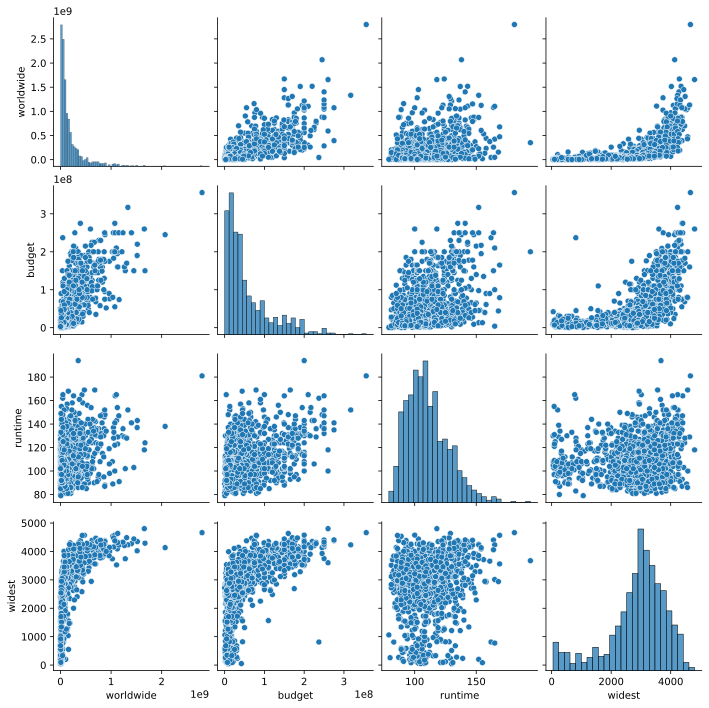

In [10]:
df_small = df_copy.loc[:,["worldwide", "budget", "runtime", "widest"]]

sns.pairplot(df_small).savefig("./charts/pairplot.png", bbox_inches='tight')
#plt.savefig("./charts/pairplot.png",dpi=fig.dpi,bbox_inches='tight')

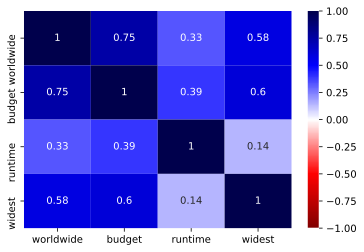

In [11]:
sns.heatmap(df_small.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/heat_map.png")

## Simple Linear Regression

In [12]:
X = df_copy[["budget", "runtime", "widest"]]
y = df_copy["worldwide"]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, Alice in Wonderland to The Wizard of Oz 2019 Re-release
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   1151 non-null   float64
 1   runtime  1151 non-null   float64
 2   widest   1151 non-null   float64
dtypes: float64(3)
memory usage: 36.0+ KB


In [14]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.5872906025033997

<Figure size 1080x432 with 0 Axes>

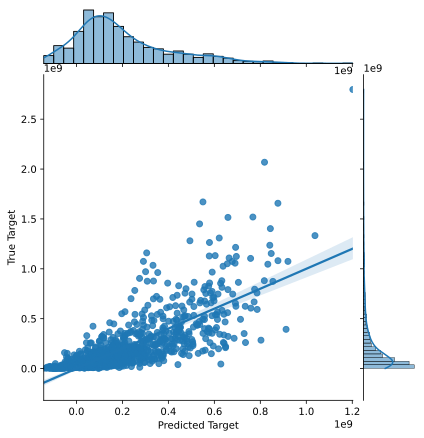

In [15]:
preds = lr.predict(X)  # generate predictions (on training data) using fit model

plt.figure(figsize=(15, 6))
sns.jointplot(x=preds,y=y, kind='reg')  # a plot of actual vs. predicted values
plt.ylabel("True Target");
plt.xlabel("Predicted Target");
plt.savefig("./charts/LR_jointplot.png")

## OLS

In [16]:
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              worldwide   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     544.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          7.74e-220
Time:                        03:25:42   Log-Likelihood:                -23454.
No. Observations:                1151   AIC:                         4.692e+04
Df Residuals:                    1147   BIC:                         4.694e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.516e+08   3.93e+07     -6.396      0.000   -3.29e+08   -1.74e+08
budget         2.7531      0.121     22.727      0.000       2.515       2.991
runtime      1.11e+06   3.27e+05      3.396      0.001    4.69e+05    1.75e+06
widest      5.859e+04   6506.779      9.005      0.000    4.58e+04    7.14e+04
==============================================================================
Omnibus:                      664.497   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10855.225
Skew:                           2.321   Prob(JB):                         0.00
Kurtosis:                      17.311   Cond. No.                     6.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train, test, and split 

In [17]:
X = df_copy[["budget", "runtime", "widest"]]
y = df_copy["worldwide"]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, Alice in Wonderland to The Wizard of Oz 2019 Re-release
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   1151 non-null   float64
 1   runtime  1151 non-null   float64
 2   widest   1151 non-null   float64
dtypes: float64(3)
memory usage: 76.0+ KB


In [19]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5798734283247353

# Feature Engineering

## Polynomial

In [21]:
X = df_copy[["budget", "runtime", "widest"]]
y = df_copy["worldwide"]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, Alice in Wonderland to The Wizard of Oz 2019 Re-release
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   1151 non-null   float64
 1   runtime  1151 non-null   float64
 2   widest   1151 non-null   float64
dtypes: float64(3)
memory usage: 76.0+ KB


In [23]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [24]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

X_val_poly = poly.transform(X_val)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [25]:
lr_poly.score(X_val_poly, y_val) 

0.7558939139492149

In [26]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [27]:
lr_poly.coef_

array([ 0.00000000e+00, -6.47141170e+00,  6.32172500e+02, -1.04177525e+05,
        5.41423805e-09,  1.68676261e-02,  1.38473898e-03,  5.59647719e+03,
       -3.64352593e+02,  4.49106892e+01])

In [28]:
poly

PolynomialFeatures()

# Simple Validation Method: Train, Validation, and Test

In [29]:
X = df_copy[["budget", "runtime", "widest"]]
y = df_copy["worldwide"]

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, Alice in Wonderland to The Wizard of Oz 2019 Re-release
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   1151 non-null   float64
 1   runtime  1151 non-null   float64
 2   widest   1151 non-null   float64
dtypes: float64(3)
memory usage: 76.0+ KB


In [31]:
# test/val/train = 60/20/20
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [32]:
##set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=60)  # TUNED this! 
                        ## tried but R^2 only went up 0.001 from 0.305 to 0.306(when change alpha from 1 to 60) 

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [33]:
#validate

lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')  

Linear Regression val R^2: 0.633
Ridge Regression val R^2: 0.639
Degree 2 polynomial regression val R^2: 0.756


In [34]:
# The Degree 2 Polynomial got the highest score

In [35]:
# Fit ridge to poly

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1) 

lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [36]:
lr_poly.score(X_test_poly, y_test)

0.664146037724626

### Cross-Validation / Test

In [37]:
lr = LinearRegression()

cross_val_score(lr, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.52032519, 0.52664943, 0.64611782, 0.59913997, 0.56021463])

In [38]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lr, X, y, cv=kf, scoring='r2')

array([0.51588948, 0.62157909, 0.64721108, 0.59101402, 0.53006001])

In [39]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')))  
print(np.mean(cross_val_score(lr_reg, X, y, cv=kf, scoring='r2')))# may change

0.5801959369354565
0.5801959575235092


In [40]:
# Decreased the R^2, maybe due to the DataFrame size

### Add Quantitative data (Categorycal)

- Add Distributor

In [41]:
df_copy

domestic   worldwide  \
title                                                     
Alice in Wonderland               334191110  1025467110   
Iron Man 2                        312433331   623933331   
The Twilight Saga: Eclipse        300531751   698491347   
Inception                         292576195   826137188   
Despicable Me                     251513985   543113985   
...                                     ...         ...   
The Best of Enemies                10205616    10209813   
Motherless Brooklyn                 9277736    18477736   
The Goldfinch                       5332621     9932621   
Don't Let Go                        5215062     5288011   
The Wizard of Oz 2019 Re-release    2076020     2097514   

                                                          distributor  \
title                                                                   
Alice in Wonderland               Walt Disney Studios Motion Pictures   
Iron Man 2                                         Paramount Pictures   
The Twilight Saga: Eclipse                       Summit Entertainment   
Inception                                                Warner Bros.   
Despicable Me                                      Universal Pictures   
...                                                               ...   
The Best of Enemies                                 STX Entertainment   
Motherless Brooklyn                                      Warner Bros.   
The Goldfinch                                            Warner Bros.   
Don't Let Go                                                    Other   
The Wizard of Oz 2019 Re-release                                Other   

                                      opening       budget        date  \
title                                                                    
Alice in Wonderland               116101023.0  200000000.0  2010-03-05   
Iron Man 2                        128122480.0  200000000.0  2010-05-07   
The Twilight Saga: Eclipse         64832191.0   68000000.0  2010-06-30   
Inception                          62785337.0  160000000.0  2010-07-16   
Despicable Me                      56397125.0   69000000.0  2010-07-09   
...                                       ...          ...         ...   
The Best of Enemies                 4446190.0   10000000.0  2019-04-05   
Motherless Brooklyn                 3500454.0   26000000.0  2019-11-01   
The Goldfinch                       2679027.0   45000000.0  2019-09-13   
Don't Let Go                        2338669.0    5000000.0  2019-08-30   
The Wizard of Oz 2019 Re-release    1195606.0    2777000.0  2019-01-27   

                                  runtime  widest rating  \
title                                                      
Alice in Wonderland                 108.0  3739.0     PG   
Iron Man 2                          124.0  4390.0  PG-13   
The Twilight Saga: Eclipse          124.0  4468.0  PG-13   
Inception                           148.0  3792.0  PG-13   
Despicable Me                        95.0  3602.0     PG   
...                                   ...     ...    ...   
The Best of Enemies                 133.0  1705.0  PG-13   
Motherless Brooklyn                 144.0  1342.0      R   
The Goldfinch                       149.0  2542.0      R   
Don't Let Go                        103.0   922.0      R   
The Wizard of Oz 2019 Re-release    102.0   681.0     PG   

                                                                             genres  \
title                                                                                 
Alice in Wonderland                                      Adventure, Family, Fantasy   
Iron Man 2                                                Action, Adventure, Sci-Fi   
The Twilight Saga: Eclipse        Action, Adventure, Drama, Fantasy, Romance, Th...   
Inception                                       Action, Adventure, Sci-Fi, Thriller   
Despicable Me                             Animation

In [42]:
worldwide_distributor = df_copy.loc[:, ['worldwide', 'distributor']]
group_dist = worldwide_distributor.groupby(["distributor"]).sum()

# Desecending Distributor by revenue
group_dist = group_dist.sort_values(by='worldwide', ascending=False)

In [43]:
group_dist

worldwide
distributor                                     
Walt Disney Studios Motion Pictures  44779758978
Universal Pictures                   35201356014
Warner Bros.                         34005480134
Twentieth Century Fox                30491596466
Sony Pictures Entertainment (SPE)    22929627843
Paramount Pictures                   19096748428
Lionsgate                            11815449472
DreamWorks                            5076602188
Other                                 3534773337
Screen Gems                           3124513323
The Weinstein Company                 2289985321
Summit Entertainment                  2254643743
Focus Features                        1927612899
STX Entertainment                     1724791537
TriStar Pictures                      1704652743
Relativity Media                      1694029447
Fox Searchlight Pictures              1440060894
Open Road Films (II)                   946432499
FilmDistrict                           713135446
Sony Pictures Classics                 484367058
CBS Films                              459111092
Roadside Attractions                   285623790

In [44]:
worldwide_distributor

worldwide  \
title                                          
Alice in Wonderland               1025467110   
Iron Man 2                         623933331   
The Twilight Saga: Eclipse         698491347   
Inception                          826137188   
Despicable Me                      543113985   
...                                      ...   
The Best of Enemies                 10209813   
Motherless Brooklyn                 18477736   
The Goldfinch                        9932621   
Don't Let Go                         5288011   
The Wizard of Oz 2019 Re-release     2097514   

                                                          distributor  
title                                                                  
Alice in Wonderland               Walt Disney Studios Motion Pictures  
Iron Man 2                                         Paramount Pictures  
The Twilight Saga: Eclipse                       Summit Entertainment  
Inception                                                Warner Bros.  
Despicable Me                                      Universal Pictures  
...                                                               ...  
The Best of Enemies                                 STX Entertainment  
Motherless Brooklyn                                      Warner Bros.  
The Goldfinch                                            Warner Bros.  
Don't Let Go                                                    Other  
The Wizard of Oz 2019 Re-release                                Other  

[1151 rows x 2 columns]

In [45]:
distributor_dummies = pd.get_dummies(worldwide_distributor, drop_first=True)
distributor_dummies.head()

worldwide  distributor_DreamWorks  \
title                                                            
Alice in Wonderland         1025467110                       0   
Iron Man 2                   623933331                       0   
The Twilight Saga: Eclipse   698491347                       0   
Inception                    826137188                       0   
Despicable Me                543113985                       0   

                            distributor_FilmDistrict  \
title                                                  
Alice in Wonderland                                0   
Iron Man 2                                         0   
The Twilight Saga: Eclipse                         0   
Inception                                          0   
Despicable Me                                      0   

                            distributor_Focus Features  \
title                                                    
Alice in Wonderland                                  0   
Iron Man 2                                           0   
The Twilight Saga: Eclipse                           0   
Inception                                            0   
Despicable Me                                        0   

                            distributor_Fox Searchlight Pictures  \
title                                                              
Alice in Wonderland                                            0   
Iron Man 2                                                     0   
The Twilight Saga: Eclipse                                     0   
Inception                                                      0   
Despicable Me                                                  0   

                            distributor_Lionsgate  \
title                                               
Alice in Wonderland                             0   
Iron Man 2                                      0   
The Twilight Saga: Eclipse                      0   
Inception                                       0   
Despicable Me                                   0   

                            distributor_Open Road Films (II)  \
title                                                          
Alice in Wonderland                                        0   
Iron Man 2                                                 0   
The Twilight Saga: Eclipse                                 0   
Inception                                                  0   
Despicable Me                                              0   

                            distributor_Other  distributor_Paramount Pictures  \
title                                                                           
Alice in Wonderland                         0                               0   
Iron Man 2                                  0                               1   
The Twilight Saga: Eclipse                  0                               0   
Inception                                   0                               0   
Despicable Me                               0                               0   

                            distributor_Relativity Media  ...  \
title                                                     ...   
Alice in Wonderland                                    0  ...   
Iron Man 2                                             0  ...   
The Twilight Saga: Eclipse                             0  ...   
Inception                                              0  ...   
Despicable Me                                          0  ...   

                            distributor_Screen Gems  \
title                                                 
Alice in Wonderland                               0   
Iron Man 2                                        0   
The Twilight Saga: Eclipse                        0   
Inception                                         0   
Despicable Me                                     0   

                            distributor_Sony Pictures Clas

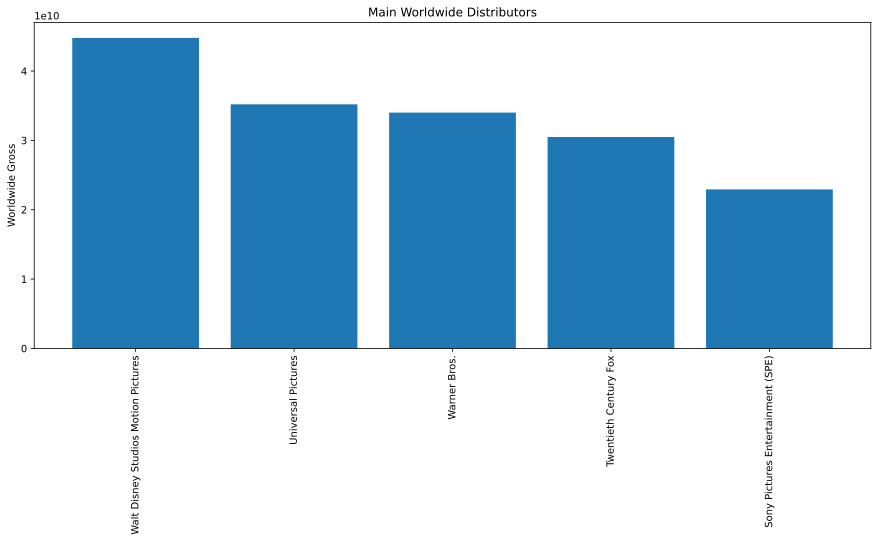

In [46]:

plt.figure(figsize=(15, 6))
plt.bar(group_dist.index[:5], group_dist.worldwide[:5])
plt.xticks(rotation=90);
plt.ylabel("Worldwide Gross");
plt.title('Main Worldwide Distributors');
plt.savefig('./charts/top5_dist.png', bbox_inches='tight')

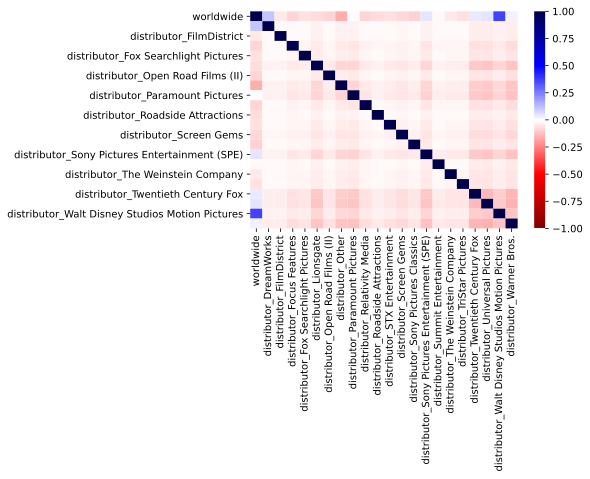

In [47]:
sns.heatmap(distributor_dummies.corr(), cmap="seismic_r", annot=False, vmin=-1, vmax=1)
plt.savefig("./charts/distributor_heat_map.png")

- Add Genres

In [67]:
X = df_genres


In [68]:
X

Action  Adventure  Animation  Biography  \
title                                                                       
Alice in Wonderland                    0          1          0          0   
Iron Man 2                             1          1          0          0   
The Twilight Saga: Eclipse             1          1          0          0   
Inception                              1          1          0          0   
Despicable Me                          0          0          1          0   
...                                  ...        ...        ...        ...   
The Best of Enemies                    0          0          0          1   
Motherless Brooklyn                    0          0          0          0   
The Goldfinch                          0          0          0          0   
Don't Let Go                           0          0          0          0   
The Wizard of Oz 2019 Re-release       0          1          0          0   

                                  Comedy  Crime  Documentary  Drama  Family  \
title                                                                         
Alice in Wonderland                    0      0            0      0       1   
Iron Man 2                             0      0            0      0       0   
The Twilight Saga: Eclipse             0      0            0      1       0   
Inception                              0      0            0      0       0   
Despicable Me                          1      1            0      0       1   
...                                  ...    ...          ...    ...     ...   
The Best of Enemies                    0      0            0      1       0   
Motherless Brooklyn                    0      1            0      1       0   
The Goldfinch                          0      0            0      1       0   
Don't Let Go                           0      0            0      1       0   
The Wizard of Oz 2019 Re-release       0      0            0      0       1   

                                  Fantasy  ...  Horror  Music  Musical  \
title                                      ...                           
Alice in Wonderland                     1  ...       0      0        0   
Iron Man 2                              0  ...       0      0        0   
The Twilight Saga: Eclipse              1  ...       0      0        0   
Inception                               0  ...       0      0        0   
Despicable Me                           1  ...       0      0        0   
...                                   ...  ...     ...    ...      ...   
The Best of Enemies                     0  ...       0      0        0   
Motherless Brooklyn                     0  ...       0      0        0   
The Goldfinch                           0  ...       0      0        0   
Don't Let Go                            0  ...       1      0        0   
The Wizard of Oz 2019 Re-release        1  ...       0      0        1   

                                  Mystery  Romance  Sci-Fi  Sport  Thriller  \
title                                                                         
Alice in Wonderland                     0        0       0      0         0   
Iron Man 2                              0        0       1      0         0   
The Twilight Saga: Eclipse              0        1       0      0         1   
Inception                               0        0       1      0         1   
Despicable Me                           0        0       0      0         0   
...                                   ...      ...     ...    ...       ...   
The Best of Enemies                     0        0       0      0         0   
Motherless Brooklyn                     1        0       0      0         0   
The Goldfinch                           0        0       0      0         0   
Don't Let Go                            1        0       1      0         1   
The Wizard of Oz 2019 Re-release        0        0       0      0         0   

             

In [70]:
y = df_copy["worldwide"]

In [71]:
y

title
Alice in Wonderland                 1025467110
Iron Man 2                           623933331
The Twilight Saga: Eclipse           698491347
Inception                            826137188
Despicable Me                        543113985
                                       ...    
The Best of Enemies                   10209813
Motherless Brooklyn                   18477736
The Goldfinch                          9932621
Don't Let Go                           5288011
The Wizard of Oz 2019 Re-release       2097514
Name: worldwide, Length: 1151, dtype: int64

Let's add the categoical to the OLS.

In [48]:
df_united = df_copy.merge(distributor_dummies, left_index=True, right_index=True)
df_united

domestic  worldwide_x  \
title                                                
12 Years a Slave             56671993    187733202   
127 Hours                    18335230     60738797   
13 Hours                     52853219     69411370   
1917                        159227644    384623579   
2 Guns                       75612460    131940411   
...                               ...          ...   
Youth in Revolt              15281286     19651093   
Zero Dark Thirty             95720716    132820716   
Zombieland: Double Tap       73123082    122810399   
Zookeeper                    80360843    169852759   
xXx: Return of Xander Cage   44898413    346118277   

                                                  distributor     opening  \
title                                                                       
12 Years a Slave                     Fox Searchlight Pictures    923715.0   
127 Hours                            Fox Searchlight Pictures    264851.0   
13 Hours                                   Paramount Pictures  16194738.0   
1917                                       Universal Pictures    576216.0   
2 Guns                                     Universal Pictures  27059130.0   
...                                                       ...         ...   
Youth in Revolt                                         Other   6888334.0   
Zero Dark Thirty            Sony Pictures Entertainment (SPE)    417150.0   
Zombieland: Double Tap      Sony Pictures Entertainment (SPE)  26803104.0   
Zookeeper                   Sony Pictures Entertainment (SPE)  20065617.0   
xXx: Return of Xander Cage                 Paramount Pictures  20130142.0   

                                budget        date  runtime  widest rating  \
title                                                                        
12 Years a Slave            20000000.0  2013-10-18    134.0  1474.0      R   
127 Hours                   18000000.0  2010-11-05     94.0   916.0      R   
13 Hours                    50000000.0  2016-01-15    144.0  2917.0      R   
1917                        95000000.0  2019-12-25    119.0  3987.0      R   
2 Guns                      61000000.0  2013-08-02    109.0  3028.0      R   
...                                ...         ...      ...     ...    ...   
Youth in Revolt             18000000.0  2010-01-08     90.0  1873.0      R   
Zero Dark Thirty            40000000.0  2012-12-19    157.0  2946.0      R   
Zombieland: Double Tap      42000000.0  2019-10-18     99.0  3468.0      R   
Zookeeper                   80000000.0  2011-07-08    102.0  3482.0     PG   
xXx: Return of Xander Cage  85000000.0  2017-01-20    107.0  3651.0  PG-13   

                                                           genres  ...  \
title                                                              ...   
12 Years a Slave                        Biography, Drama, History  ...   
127 Hours                                        Biography, Drama  ...   
13 Hours                    Action, Drama, History, Thriller, War  ...   
1917                                         Drama, Thriller, War  ...   
2 Guns                                    Action, Crime, Thriller  ...   
...                                                           ...  ...   
Youth in Revolt                            Comedy, Drama, Romance  ...   
Zero Dark Thirty                    Drama, History, Thriller, War  ...   
Zombieland: Double Tap                     Action, Comedy, Horror  ...   
Zookeeper                        Comedy, Family, Fantasy, Romance  ...   
xXx: Return of Xander Cage            Action, Adventure, Thriller  ...   

                           distributor_Screen Gems  \
title                                                
12 Years a Slave                                 0   
127 Hours                                        0   
13 Hours                                         0   
1917                                             0   
2 Guns                

Let's use a function to split and validate.

In [49]:
X = df_copy[["budget", "runtime", "widest"]]
y = df_copy["worldwide"]

In [50]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

### 1. Baseline using feature set

In [51]:
#split_and_validate(X, y)
split_and_validate(X, y)


Validation R^2 score was: 0.6287849601839377
Feature coefficient results: 

budget : 2.55
runtime : 1069003.23
widest : 65744.27


### 2. Basic feature engineering: adding polynomial terms¶

In [52]:
#X = df_copy[["budget", "runtime", "widest"]]
X2 = X

X2['BUD2'] = X2['budget'] ** 2
X2['RT2'] = X2['runtime'] ** 2
X2['WR2'] = X2['widest'] ** 2

split_and_validate(X2, y)



Validation R^2 score was: 0.7122172739361602
Feature coefficient results: 

budget : -1.33
runtime : -25.69
widest : -209696.27
BUD2 : 0.00
RT2 : 5556.80
WR2 : 70.83


<ipython-input-52-bfd1e279393f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['BUD2'] = X2['budget'] ** 2
<ipython-input-52-bfd1e279393f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['RT2'] = X2['runtime'] ** 2
<ipython-input-52-bfd1e279393f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

### 3. Basic feature engineering: adding interaction terms

In [53]:
X3 = X2

# multiplicative interaction
X3['RT_x_WR'] = X3['runtime'] * X3['widest']

# division interaction
#X3['RT_x_WR'] = X3['runtime'] / X3['widest']
#X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

split_and_validate(X3, y)


Validation R^2 score was: 0.7153230755378592
Feature coefficient results: 

budget : -1.26
runtime : 530.77
widest : -278396.98
BUD2 : 0.00
RT2 : -2434.78
WR2 : 70.43
RT_x_WR : 638.74


<ipython-input-53-54a404c8fc4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['RT_x_WR'] = X3['runtime'] * X3['widest']


### 4. Intermediate feature engineering: categories and features derived from category aggregates

In [79]:
X4 = X3

X4['distributor'] = df_copy['distributor']
X4['season'] = df_copy['date_to_season']
X4['rating'] = df_copy['rating']


split_and_validate(pd.get_dummies(X4, drop_first=True), y)


Validation R^2 score was: 0.715323706249321
Feature coefficient results: 

budget : -1.26
runtime : 503.25
widest : -278396.94
BUD2 : 0.00
RT2 : -2434.47
WR2 : 70.43
RT_x_WR : 638.74
distributor_DreamWorks : -10.30
distributor_FilmDistrict : 0.22
distributor_Focus Features : 7.05
distributor_Fox Searchlight Pictures : 20.83
distributor_Lionsgate : 23.60
distributor_Open Road Films (II) : -9.11
distributor_Other : 25.69
distributor_Paramount Pictures : -14.27
distributor_Relativity Media : -9.98
distributor_Roadside Attractions : 14.02
distributor_STX Entertainment : -9.98
distributor_Screen Gems : -16.74
distributor_Sony Pictures Classics : 35.96
distributor_Sony Pictures Entertainment (SPE) : -10.99
distributor_Summit Entertainment : 13.32
distributor_The Weinstein Company : 0.71
distributor_TriStar Pictures : -9.91
distributor_Twentieth Century Fox : -51.96
distributor_Universal Pictures : -19.63
distributor_Walt Disney Studios Motion Pictures : -23.21
distributor_Warner Bros. : 44.

<ipython-input-79-5743958c255e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['distributor'] = df_copy['distributor']
<ipython-input-79-5743958c255e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['season'] = df_copy['date_to_season']
<ipython-input-79-5743958c255e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

Getting to fancier features

In [80]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature

In [83]:
X6 = X5.copy()

add_deviation_feature(X6, 'budget', 'distributor')
add_deviation_feature(X6, 'runtime', 'rating')

split_and_validate(pd.get_dummies(X6), y)


Validation R^2 score was: 0.7153236891279996
Feature coefficient results: 

budget : -1.26
runtime : 502.67
widest : -278396.90
BUD2 : 0.00
RT2 : -2434.47
WR2 : 70.43
RT_x_WR : 638.74
budget_Dev_distributor : 36.96
runtime_Dev_rating : 0.20
distributor_CBS Films : 0.63
distributor_DreamWorks : -10.30
distributor_FilmDistrict : 0.21
distributor_Focus Features : 7.04
distributor_Fox Searchlight Pictures : 20.83
distributor_Lionsgate : 23.59
distributor_Open Road Films (II) : -9.11
distributor_Other : 25.67
distributor_Paramount Pictures : -14.27
distributor_Relativity Media : -9.99
distributor_Roadside Attractions : 14.01
distributor_STX Entertainment : -9.98
distributor_Screen Gems : -16.75
distributor_Sony Pictures Classics : 35.95
distributor_Sony Pictures Entertainment (SPE) : -11.00
distributor_Summit Entertainment : 13.31
distributor_The Weinstein Company : 0.71
distributor_TriStar Pictures : -9.91
distributor_Twentieth Century Fox : -51.97
distributor_Universal Pictures : -19.63


budget  runtime  widest          BUD2  \
title                                                                          
Alice in Wonderland               200000000.0    108.0  3739.0  4.000000e+16   
Iron Man 2                        200000000.0    124.0  4390.0  4.000000e+16   
The Twilight Saga: Eclipse         68000000.0    124.0  4468.0  4.624000e+15   
Inception                         160000000.0    148.0  3792.0  2.560000e+16   
Despicable Me                      69000000.0     95.0  3602.0  4.761000e+15   
...                                       ...      ...     ...           ...   
The Best of Enemies                10000000.0    133.0  1705.0  1.000000e+14   
Motherless Brooklyn                26000000.0    144.0  1342.0  6.760000e+14   
The Goldfinch                      45000000.0    149.0  2542.0  2.025000e+15   
Don't Let Go                        5000000.0    103.0   922.0  2.500000e+13   
The Wizard of Oz 2019 Re-release    2777000.0    102.0   681.0  7.711729e+12   

                                      RT2         WR2   RT_x_WR  \
title                                                             
Alice in Wonderland               11664.0  13980121.0  403812.0   
Iron Man 2                        15376.0  19272100.0  544360.0   
The Twilight Saga: Eclipse        15376.0  19963024.0  554032.0   
Inception                         21904.0  14379264.0  561216.0   
Despicable Me                      9025.0  12974404.0  342190.0   
...                                   ...         ...       ...   
The Best of Enemies               17689.0   2907025.0  226765.0   
Motherless Brooklyn               20736.0   1800964.0  193248.0   
The Goldfinch                     22201.0   6461764.0  378758.0   
Don't Let Go                      10609.0    850084.0   94966.0   
The Wizard of Oz 2019 Re-release  10404.0    463761.0   69462.0   

                                                          distributor  season  \
title                                                                           
Alice in Wonderland               Walt Disney Studios Motion Pictures  spring   
Iron Man 2                                         Paramount Pictures  spring   
The Twilight Saga: Eclipse                       Summit Entertainment  summer   
Inception                                                Warner Bros.  summer   
Despicable Me                                      Universal Pictures  summer   
...                                                               ...     ...   
The Best of Enemies                                 STX Entertainment  spring   
Motherless Brooklyn                                      Warner Bros.    fall   
The Goldfinch                                            Warner Bros.    fall   
Don't Let Go                                                    Other  summer   
The Wizard of Oz 2019 Re-release                                Other  winter   

                                 rating  
title                                    
Alice in Wonderland                  PG  
Iron Man 2                        PG-13  
The Twilight Saga: Eclipse        PG-13  
Inception                         PG-13  
Despicable Me                        PG  
...                                 ...  
The Best of Enemies               PG-13  
Motherless Brooklyn                   R  
The Goldfinch                         R  
Don't Let Go                          R  
The Wizard of Oz 2019 Re-release     PG  

[1151 rows x 10 columns]

In [55]:
df_united

domestic  worldwide_x  \
title                                                
12 Years a Slave             56671993    187733202   
127 Hours                    18335230     60738797   
13 Hours                     52853219     69411370   
1917                        159227644    384623579   
2 Guns                       75612460    131940411   
...                               ...          ...   
Youth in Revolt              15281286     19651093   
Zero Dark Thirty             95720716    132820716   
Zombieland: Double Tap       73123082    122810399   
Zookeeper                    80360843    169852759   
xXx: Return of Xander Cage   44898413    346118277   

                                                  distributor     opening  \
title                                                                       
12 Years a Slave                     Fox Searchlight Pictures    923715.0   
127 Hours                            Fox Searchlight Pictures    264851.0   
13 Hours                                   Paramount Pictures  16194738.0   
1917                                       Universal Pictures    576216.0   
2 Guns                                     Universal Pictures  27059130.0   
...                                                       ...         ...   
Youth in Revolt                                         Other   6888334.0   
Zero Dark Thirty            Sony Pictures Entertainment (SPE)    417150.0   
Zombieland: Double Tap      Sony Pictures Entertainment (SPE)  26803104.0   
Zookeeper                   Sony Pictures Entertainment (SPE)  20065617.0   
xXx: Return of Xander Cage                 Paramount Pictures  20130142.0   

                                budget        date  runtime  widest rating  \
title                                                                        
12 Years a Slave            20000000.0  2013-10-18    134.0  1474.0      R   
127 Hours                   18000000.0  2010-11-05     94.0   916.0      R   
13 Hours                    50000000.0  2016-01-15    144.0  2917.0      R   
1917                        95000000.0  2019-12-25    119.0  3987.0      R   
2 Guns                      61000000.0  2013-08-02    109.0  3028.0      R   
...                                ...         ...      ...     ...    ...   
Youth in Revolt             18000000.0  2010-01-08     90.0  1873.0      R   
Zero Dark Thirty            40000000.0  2012-12-19    157.0  2946.0      R   
Zombieland: Double Tap      42000000.0  2019-10-18     99.0  3468.0      R   
Zookeeper                   80000000.0  2011-07-08    102.0  3482.0     PG   
xXx: Return of Xander Cage  85000000.0  2017-01-20    107.0  3651.0  PG-13   

                                                           genres  ...  \
title                                                              ...   
12 Years a Slave                        Biography, Drama, History  ...   
127 Hours                                        Biography, Drama  ...   
13 Hours                    Action, Drama, History, Thriller, War  ...   
1917                                         Drama, Thriller, War  ...   
2 Guns                                    Action, Crime, Thriller  ...   
...                                                           ...  ...   
Youth in Revolt                            Comedy, Drama, Romance  ...   
Zero Dark Thirty                    Drama, History, Thriller, War  ...   
Zombieland: Double Tap                     Action, Comedy, Horror  ...   
Zookeeper                        Comedy, Family, Fantasy, Romance  ...   
xXx: Return of Xander Cage            Action, Adventure, Thriller  ...   

                           distributor_Screen Gems  \
title                                                
12 Years a Slave                                 0   
127 Hours                                        0   
13 Hours                                         0   
1917                                             0   
2 Guns                

In [56]:
df_united = df_united.merge(df_genres, left_index=True, right_index=True)
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 12 Years a Slave to xXx: Return of Xander Cage
Data columns (total 54 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   domestic                                         1163 non-null   int64  
 1   worldwide_x                                      1163 non-null   int64  
 2   distributor                                      1163 non-null   object 
 3   opening                                          1163 non-null   float64
 4   budget                                           1163 non-null   float64
 5   date                                             1163 non-null   object 
 6   runtime                                          1163 non-null   float64
 7   widest                                           1163 non-null   float64
 8   rating                                           1163 non-null   object 
 9 

In [57]:
df_united = df_united.merge(df_rating, left_index=True, right_index=True)
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 12 Years a Slave to xXx: Return of Xander Cage
Data columns (total 57 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   domestic                                         1179 non-null   int64  
 1   worldwide_x                                      1179 non-null   int64  
 2   distributor                                      1179 non-null   object 
 3   opening                                          1179 non-null   float64
 4   budget                                           1179 non-null   float64
 5   date                                             1179 non-null   object 
 6   runtime                                          1179 non-null   float64
 7   widest                                           1179 non-null   float64
 8   rating                                           1179 non-null   object 
 9 

In [58]:
df_united = df_united.merge(df_season, left_index=True, right_index=True)
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 12 Years a Slave to xXx: Return of Xander Cage
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   domestic                                         1211 non-null   int64  
 1   worldwide_x                                      1211 non-null   int64  
 2   distributor                                      1211 non-null   object 
 3   opening                                          1211 non-null   float64
 4   budget                                           1211 non-null   float64
 5   date                                             1211 non-null   object 
 6   runtime                                          1211 non-null   float64
 7   widest                                           1211 non-null   float64
 8   rating                                           1211 non-null   object 
 9 

### Linear Regression, Feature Engineering, RidgeCV, LassoCV with categorical

In [86]:
df_united.columns

Index(['domestic', 'worldwide_x', 'distributor', 'opening', 'budget', 'date',
       'runtime', 'widest', 'rating', 'genres', 'date_to_season',
       'worldwide_y', 'distributor_DreamWorks', 'distributor_FilmDistrict',
       'distributor_Focus Features', 'distributor_Fox Searchlight Pictures',
       'distributor_Lionsgate', 'distributor_Open Road Films (II)',
       'distributor_Other', 'distributor_Paramount Pictures',
       'distributor_Relativity Media', 'distributor_Roadside Attractions',
       'distributor_STX Entertainment', 'distributor_Screen Gems',
       'distributor_Sony Pictures Classics',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_Summit Entertainment', 'distributor_The Weinstein Company',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'Action', 'Adventure', 'Animation',
    

In [96]:
df_united.shape

(1211, 60)

In [97]:
X = df_united[['opening', 'budget',
       'runtime', 'widest', 'distributor_DreamWorks', 'distributor_FilmDistrict',
       'distributor_Focus Features', 'distributor_Fox Searchlight Pictures',
       'distributor_Lionsgate', 'distributor_Open Road Films (II)',
       'distributor_Other', 'distributor_Paramount Pictures',
       'distributor_Relativity Media', 'distributor_Roadside Attractions',
       'distributor_STX Entertainment', 'distributor_Screen Gems',
       'distributor_Sony Pictures Classics',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_Summit Entertainment', 'distributor_The Weinstein Company',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R', 'spring', 'summer', 'winter']]

y = df_united['worldwide_x']

In [98]:
X, X_test, y, y_test = train_test_split(X ,y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [99]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8965107130032937

In [100]:
lr.score(X_val,y_val)  # Tr> Te: overfitting  # do Ridge!! prevent overfitting

0.8174637970321347

In [101]:
preds = lr.predict(X)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

print(rmse)
print(mae)

87302502.9914004
57344184.54284901


### OLS

In [103]:
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            worldwide_x   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     131.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:53:28   Log-Likelihood:                -19065.
No. Observations:                 968   AIC:                         3.824e+04
Df Residuals:                     915   BIC:                         3.849e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -1.709e+08   5.67e+07     -3.017      0.003   -2.82e+08   -5.97e+07
opening                                             6.3158      0.142     44.581      0.000       6.038       6.594
budget                                              1.0131      0.102      9.917      0.000       0.813       1.214
runtime                                          4.447e+05   2.34e+05      1.902      0.057   -1.41e+04    9.04e+05
widest                                           5221.8749   4781.156      1.092      0.275   -4161.431    1.46e+04
distributor_DreamWorks                           6.477e+07   4.24e+07      1.528      0.127   -1.84e+07    1.48e+08
distributor_FilmDistrict                        -1.435e+07   4.42e+07     -0.325      0.746   -1.01e+08    7.24e+07
distributor_Focus Features                       2.768e+06   3.39e+07      0.082      0.935   -6.38e+07    6.93e+07
distributor_Fox Searchlight Pictures             6.239e+07   3.61e+07      1.727      0.085   -8.52e+06    1.33e+08
distributor_Lionsgate                           -2.707e+07   3.03e+07     -0.894      0.371   -8.65e+07    3.23e+07
distributor_Open Road Films (II)                -2.049e+07   3.64e+07     -0.563      0.574   -9.19e+07     5.1e+07
distributor_Other                                1.434e+07   3.04e+07      0.472      0.637   -4.53e+07    7.39e+07
distributor_Paramount Pictures                   8.902e+06   3.05e+07      0.292      0.771    -5.1e+07    6.88e+07
distributor_Relativity Media                    -2.071e+07    3.4e+07     -0.610      0.542   -8.74e+07    4.59e+07
distributor_Roadside Attractions                 1.527e+07   4.34e+07      0.352      0.725   -6.99e+07       1e+08
distributor_STX Entertainment                   -7.357e+06   3.52e+07     -0.209      0.834   -7.64e+07    6.16e+07
distributor_Screen Gems                         -2.156e+07   3.34e+07     -0.645      0.519   -8.72e+07     4.4e+07
distributor_Sony Pictures Classics                3.43e+07   3.64e+07      0.942      0.346   -3.71e+07    1.06e+08
distributor_Sony Pictures Entertainment (SPE)    1.296e+07   3.03e+07      0.428      0.669   -4.65e+07    7.25e+07
distributor_Summit Entertainment                 1.153e+07   3.93e+07      0.293      0.769   -6.56e+07    8.86e+07
distributor_The Weinstein Company                6.503e+07    3.6e+07      1.806      0.071   -5.66e+06    1.36e+08
distributor_TriStar Pictures                     5.176e+05   3.98e+07      0.013      0.990   -7.77e+07    7.87e+07
distributor_Twentieth Century Fox                1.737e+07      3e+07      0.578      0.563   -4.16e+07    7.63e+07
distributor_Universal Pictures                  -5.374e+06   2.97e+

## Don't use the OLS for all the features. P values aren't ideal.

### Ridge CV

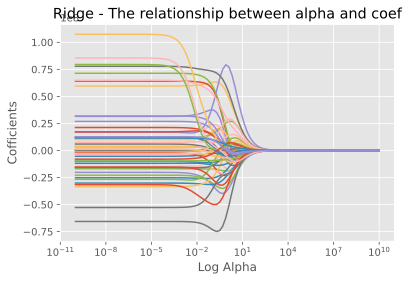

<Figure size 432x288 with 0 Axes>

In [107]:
# x_tr,x_te,y_tr,y_te = train_test_split(X,y,train_size = 0.8,random_state =22)

# add val set later?

######################ridge########################################
#tuning on alpha
alphas = 10**np.linspace(-10,10,100)
ridge_cofficients = []
 
for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)  #StandardScaler()
    ridge.fit(X_train, y_train)
    ridge_cofficients.append(ridge.coef_)
     
 #plot for the relationship between alpha and coef  
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.plot(alphas, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title(r'Ridge - The relationship between alpha and coef')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()
 
#ridge CV
ridge_cv = RidgeCV(alphas = alphas, normalize=True, cv = 10)
ridge_cv.fit(X_train, y_train)
# getting the best lambda: ridge_best_alpha = ridge_cv.alpha_
ridge_best_alpha = ridge_cv.alpha_ #the best lambda 
# modeling based on th best lambda 
ridge = Ridge(alpha = ridge_best_alpha,normalize = True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,ridge_predict))
mae = mean_absolute_error(y_test,ridge_predict)

plt.savefig("./charts/ridgeCV_alpha.png")

In [108]:
ridge.score(X_train,y_train)

0.8961468447320436

In [109]:
ridge.score(X_val,y_val) 

0.8156080608694454

In [110]:
rmse

131404440.44302246

In [111]:
mae

75764907.66523844

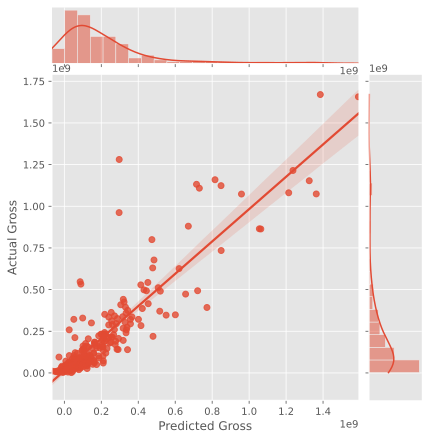

In [112]:
sns.jointplot(x=ridge_predict,y=y_test, kind='reg')  # a plot of actual vs. predicted values
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("./charts/movies_ridge_log_jointplot.png")

### LASSO CV

In [162]:
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(X_train,y_train)

lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(X_train,y_train)
 
lasso_predict = lasso.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test,lasso_predict))
mae = mean_absolute_error(y_test,ridge_predict)

/Users/diegoduque/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.679432211885056e+16, tolerance: 4545223552848217.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/diegoduque/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.41626878777554e+16, tolerance: 4545223552848217.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/diegoduque/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9789870478825472e+17, tolerance: 4545223552848217.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/diegoduque/anaconda3/lib/python3.

In [163]:
lasso.score(X_train,y_train)

0.8941322837469643

In [164]:
#lasso.alpha_

In [167]:
lasso.score(X_val,y_val) 

0.8171122815365826

In [168]:
rmse

132462678.44659646

In [169]:
mae

75764907.66523844

In [170]:
rmse

132462678.44659646

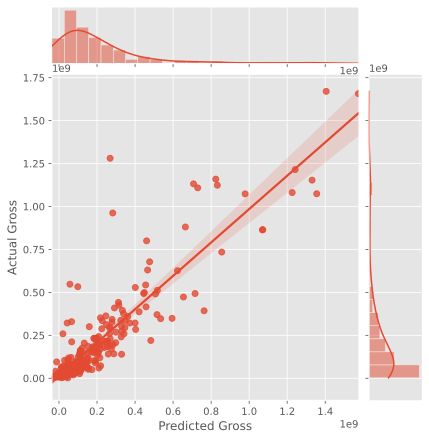

In [121]:
sns.jointplot(x=lasso_predict,y=y_test, kind='reg')
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("./charts/movies_lasso_log_jointplot.png")

### Ridge model Residuals

In [146]:
X = df_united[['opening', 'budget',
       'runtime', 'widest', 'distributor_DreamWorks', 'distributor_FilmDistrict',
       'distributor_Focus Features', 'distributor_Fox Searchlight Pictures',
       'distributor_Lionsgate', 'distributor_Open Road Films (II)',
       'distributor_Other', 'distributor_Paramount Pictures',
       'distributor_Relativity Media', 'distributor_Roadside Attractions',
       'distributor_STX Entertainment', 'distributor_Screen Gems',
       'distributor_Sony Pictures Classics',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_Summit Entertainment', 'distributor_The Weinstein Company',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R', 'spring', 'summer', 'winter']]

y = df_united['worldwide_x']

In [147]:
import scipy.stats as stats

In [153]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

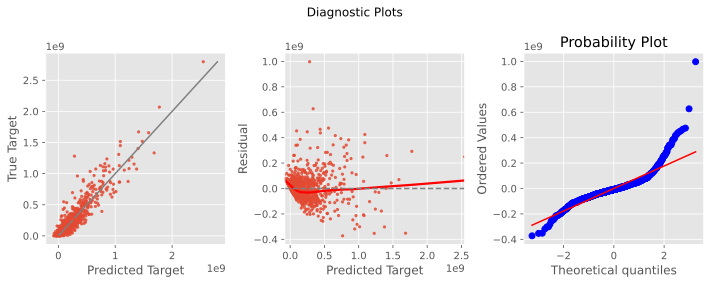

In [161]:
diagnostic_plots(fit.fittedvalues, y, fit.resid)

In [158]:
#Create the model
model = sm.OLS(y, sm.add_constant(X))
#Fit
fit = model.fit()
#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            worldwide_x   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     139.5
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:33:05   Log-Likelihood:                -23985.
No. Observations:                1211   AIC:                         4.808e+04
Df Residuals:                    1158   BIC:                         4.835e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -1.502e+08   5.51e+07     -2.727      0.006   -2.58e+08   -4.21e+07
opening                                             6.1462      0.137     44.911      0.000       5.878       6.415
budget                                              0.9430      0.101      9.351      0.000       0.745       1.141
runtime                                          7.054e+05   2.29e+05      3.074      0.002    2.55e+05    1.16e+06
widest                                           9237.7151   4857.629      1.902      0.057    -293.025    1.88e+04
distributor_DreamWorks                            8.98e+07   4.55e+07      1.973      0.049    5.16e+05    1.79e+08
distributor_FilmDistrict                        -1.827e+07   4.45e+07     -0.411      0.682   -1.06e+08     6.9e+07
distributor_Focus Features                       -8.26e+05   3.66e+07     -0.023      0.982   -7.27e+07     7.1e+07
distributor_Fox Searchlight Pictures             7.248e+07   3.89e+07      1.863      0.063   -3.87e+06    1.49e+08
distributor_Lionsgate                           -3.735e+07   3.32e+07     -1.126      0.260   -1.02e+08    2.77e+07
distributor_Open Road Films (II)                -2.941e+07   3.81e+07     -0.771      0.441   -1.04e+08    4.54e+07
distributor_Other                                1.764e+07   3.34e+07      0.529      0.597   -4.78e+07    8.31e+07
distributor_Paramount Pictures                  -6.319e+06   3.34e+07     -0.189      0.850   -7.18e+07    5.92e+07
distributor_Relativity Media                    -1.735e+07   3.66e+07     -0.474      0.636   -8.93e+07    5.45e+07
distributor_Roadside Attractions                 2.605e+07   4.42e+07      0.590      0.555   -6.06e+07    1.13e+08
distributor_STX Entertainment                   -1.939e+07    3.8e+07     -0.510      0.610    -9.4e+07    5.52e+07
distributor_Screen Gems                         -2.242e+07   3.58e+07     -0.626      0.531   -9.26e+07    4.78e+07
distributor_Sony Pictures Classics               4.099e+07   3.92e+07      1.044      0.296    -3.6e+07    1.18e+08
distributor_Sony Pictures Entertainment (SPE)    1.851e+07   3.32e+07      0.558      0.577   -4.66e+07    8.36e+07
distributor_Summit Entertainment                 1.287e+07   4.19e+07      0.307      0.759   -6.94e+07    9.51e+07
distributor_The Weinstein Company                5.784e+07   3.88e+07      1.489      0.137   -1.84e+07    1.34e+08
distributor_TriStar Pictures                    -4.182e+05    3.9e+07     -0.011      0.991   -7.69e+07    7.61e+07
distributor_Twentieth Century Fox                8.339e+06    3.3e+07      0.253      0.800   -5.64e+07     7.3e+07
distributor_Universal Pictures                  -7.584e+06   3.26e+

In [159]:
diagnostic_plots(fit.R_predict, y, fit.R_resid)

AttributeError: 'OLSResults' object has no attribute 'R_predict'

In [152]:
df_1['R_predict']= ridge.predict(X)
df_1['R_resid']= y- (df_1.R_predict)
with sns.axes_style('white'):
    plot = df_1.plot(
        kind='scatter', x='R_predict', y='R_resid', alpha=0.5, figsize=(7,5)) 

NameError: name 'df_1' is not defined